In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('video_games_sales.csv')

In [3]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.
- Critic_score - Aggregate score compiled by Metacritic staff
- Criticcount - The number of critics used in coming up with the Criticscore
- User_score - Score by Metacritic's subscribers
- Usercount - Number of users who gave the userscore
- Developer - Party responsible for creating the game
- Rating - The ESRB ratings

In [4]:
# посмотрим на типы данных и заполненность столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
# User_Score - строковый, когда Critic_Score имеет тип с плавающей точкой. Изменим тип User_Score на float
df['User_Score'] = pd.to_numeric(df['User_Score'],errors='coerce')
df['User_Score'].dtypes

dtype('float64')

In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


## Визуализация признаков

### Посмотрим на распределения продаж
Распределение сильно скошено влево. Видно, что основное кол-во значений сконцентрировано около 0 и что в данных продаж встречаются очень большие значения (выбросы).

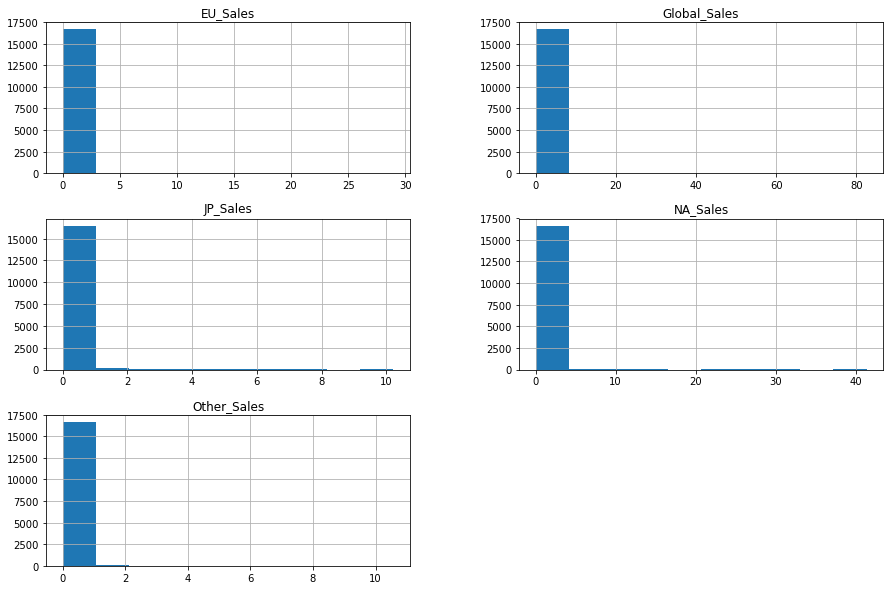

In [7]:
all_sales = df.loc[:, 'NA_Sales':'Global_Sales']
all_sales.hist(xlabelsize=10, figsize=[15,10]);

### Изучим популярность жанров
Самые популярные жанры - Active и Sports.

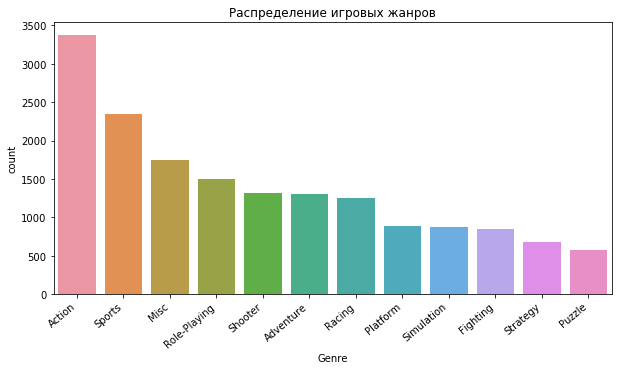

In [8]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(df['Genre'], order=df['Genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Распределение игровых жанров')
plt.show()

### Посмотрим на распределение игр по годам
Больше всего игр выпускали с 2000 по 2009.

In [9]:
unq = df['Year_of_Release'].unique()
unq.sort()
unq

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [10]:
# чтобы было удобнее смотреть, сгруппируем года по десятилетиям

for i in range(len(df)) :
    if df.loc[i, 'Year_of_Release'] < 1990:
        year_type = '80 - 89'
    elif df.loc[i, 'Year_of_Release'] < 2000:
        year_type = '90-99'
    elif df.loc[i, 'Year_of_Release'] < 2010:
        year_type = '00-09'
    elif df.loc[i, 'Year_of_Release'] < 2020:
        year_type = '10-19'
    else:
        year_type = '20'
    df.loc[i, 'year_type'] = year_type

df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,year_type
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,00-09
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,80 - 89
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,00-09


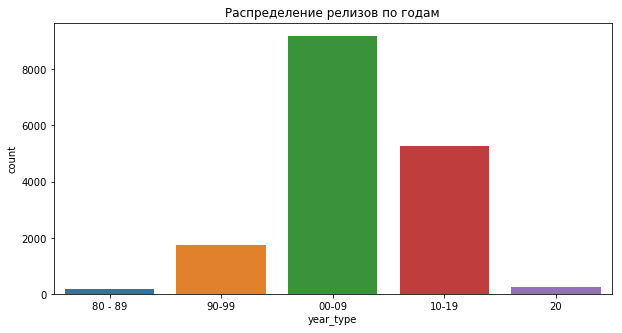

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(df['year_type'], order=['80 - 89', '90-99', '00-09', '10-19', '20'])
plt.title('Распределение релизов по годам');

## Взаимодействие признаков

### Посмотрим на продажи по годам
Также видим, что больше всего заработали в период с 2000 по 2009.

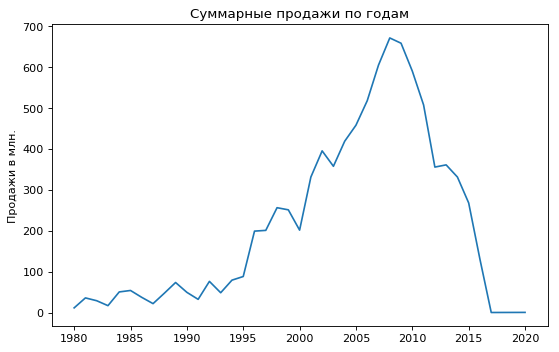

In [12]:
g_sales_by_year = df.groupby('Year_of_Release')['Global_Sales'].sum().reset_index().sort_values(by='Year_of_Release')

x_values = g_sales_by_year['Year_of_Release']
y_values = g_sales_by_year['Global_Sales']

plt.figure(num=None, figsize=(8, 5), dpi=80)
plt.ylabel('Продажи в млн.')
plt.title('Суммарные продажи по годам')
plt.plot(x_values, y_values);

### Также интересно посмотреть на продажи по жанрам
Вполне логично, что в самых популярных жанрах больше всего зарабатывают.

In [13]:
g_sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()#.sort_values(by='Genre')

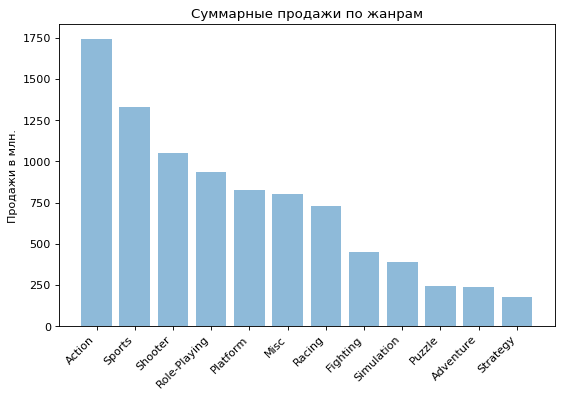

In [14]:
g_sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)

objects = g_sales_by_genre['Genre'].values
y_pos = np.arange(len(objects))
y_values = g_sales_by_genre['Global_Sales'].values

plt.figure(num=None, figsize=(8, 5), dpi=80)
plt.bar(y_pos, y_values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Продажи в млн.')
plt.title('Суммарные продажи по жанрам')
plt.show()

### Топ-15 издателей по кол-ву игр

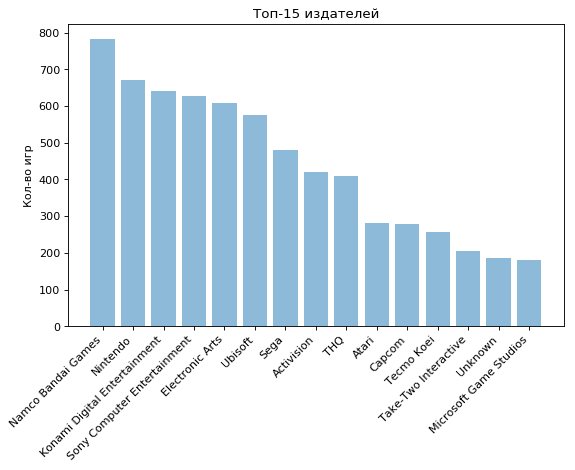

In [15]:
top_publish = df.groupby('Publisher')['Name'].nunique().sort_values(ascending=False).reset_index().head(15)

objects = top_publish['Publisher'].values
y_pos = np.arange(len(objects))
y_values = top_publish['Name'].values

plt.figure(num=None, figsize=(8, 5), dpi=80)
plt.bar(y_pos, y_values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Кол-во игр')
plt.title('Топ-15 издателей')
plt.show()

### Изучим взаимодействие двух количественных признаков: оценки критиков и оценки пользователей
Чем выше оценка критиков, тем выше пользовательская оценка.

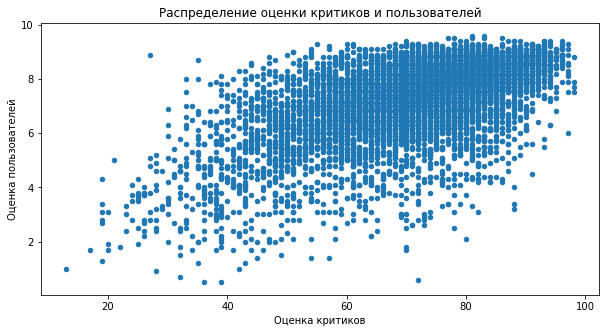

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['Critic_Score'], y=df['User_Score'], s=20)
plt.title('Распределение оценки критиков и пользователей')
plt.xlabel('Оценка критиков')
plt.ylabel('Оценка пользователей');

### Изучим взаимодействие двух категориальных признаков: рейтинг и игровой жанр
- В категории Sport чаще встречается оценка Е (игра для всех), Figting чаще ставит ограничения на T (для подростков). 
- В жанре Action встречаются разные возрастные ограничения (10+ и 17+), что может говорить о разнообразии сюжета в играх.
- Непопулярные рейтинги -  только для взрослых 18+ (AO) и раннее детство(EC). Вполне логично, т.к. чем строже ограничения рейтинга - тем меньше пользователей сможет приобрести игру.


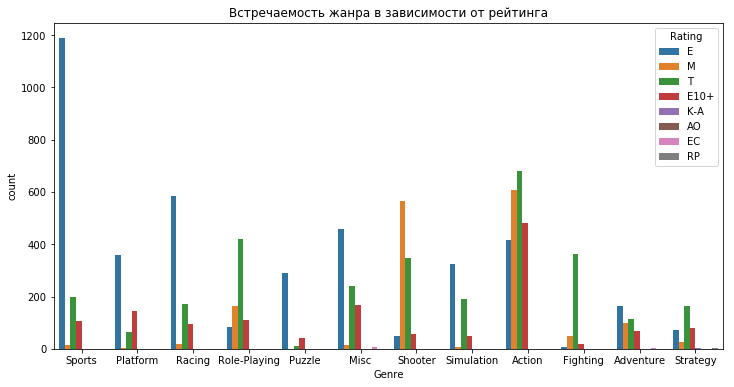

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre',hue='Rating',data = df)
plt.title('Встречаемость жанра в зависимости от рейтинга');